# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
boston = pd.read_csv('../data/boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
#CRIM: per capita crime rate by town
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM: average number of rooms per dwelling
#AGE: proportion of owner-occupied units built prior to 1940
#DIS: weighted distances to ﬁve Boston employment centers
#RAD: index of accessibility to radial highways
#TAX: full-value property-tax rate per $10,000
#PTRATIO: pupil-teacher ratio by town
#BLACK: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
#LSTAT: % lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

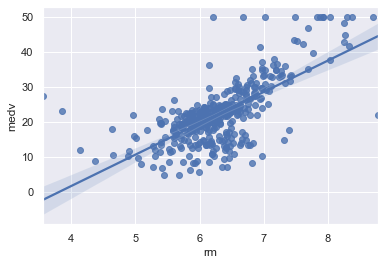

In [52]:
sns.regplot(x='rm', y='medv', data=boston)
plt.show()

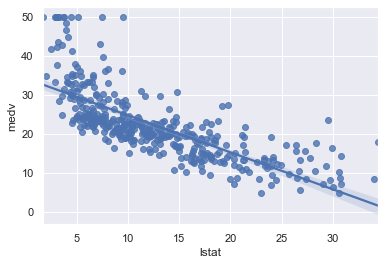

In [53]:
sns.regplot(x='lstat', y='medv', data=boston)
plt.show()

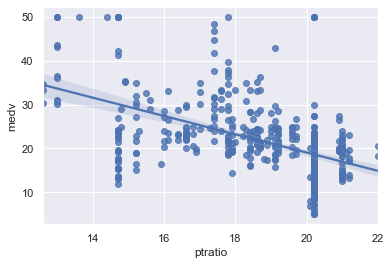

In [57]:
sns.regplot(x='ptratio', y='medv', data=boston)
plt.show()

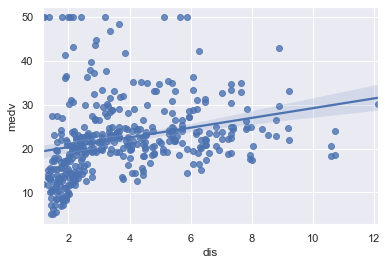

In [49]:
sns.regplot(x='dis', y='medv', data=boston)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [8]:
#we see a relationship between MEVD (median value of owner-occupied homes in $1000s) and RM (average number of rooms per dwelling)
#the more rooms in a house the highter the price
#we also see a relationship between MEVD and LSTAT (% lower status of the population)
#the lower the % lower status in the neighborhood the higher the price

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

We examine several strong correlations:
1) There is a 0.92 correlation between taxes and accessibility to radial highways, better access to highways are taxed heavier
2) There is a -0.76 correlation between weighted distances to ﬁve Boston employment centers and nitric oxides concentration
3) There is a -0.73 correlation between weighted distances to ﬁve Boston employment centers and age, 
4) There is a 0.76 correlation between nitric oxides concentration and proportion of non-retail business
5) There is a 0.73 correlation between nitric oxides concentration and proportion of owner-occupied units built prior to 1940


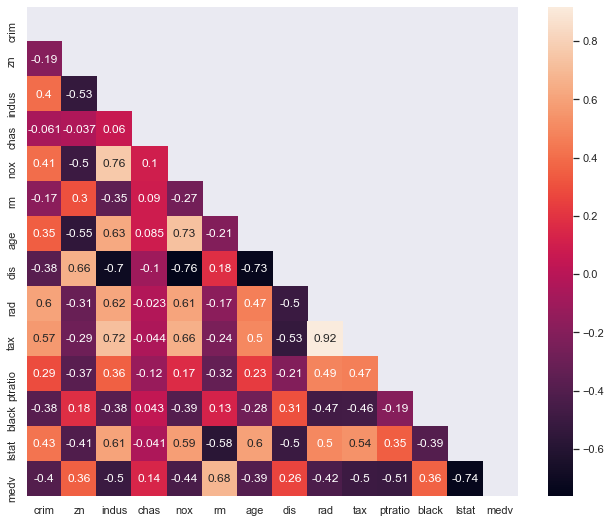

In [89]:
corr = boston.corr()

#generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#set up a matplot figure
f, ax = plt.subplots(figsize=(11,9))

#draw a heatmap with a mask
sns.heatmap(corr, mask=mask, annot=True)

print('We examine several strong correlations:')
print('1) There is a 0.92 correlation between taxes and accessibility to radial highways, better access to highways are taxed heavier')
print('2) There is a -0.76 correlation between weighted distances to ﬁve Boston employment centers and nitric oxides concentration')
print('3) There is a -0.73 correlation between weighted distances to ﬁve Boston employment centers and age, ')
print('4) There is a 0.76 correlation between nitric oxides concentration and proportion of non-retail business')
print('5) There is a 0.73 correlation between nitric oxides concentration and proportion of owner-occupied units built prior to 1940')

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [61]:
print('Minimum is:', boston['medv'].min())
print('Maximum is:', boston['medv'].max())
print('Mean is:', boston['medv'].mean())
print('Median is:', boston['medv'].median())
print('Standard deviation is:', boston['medv'].std())

Minimum is: 5.0
Maximum is: 50.0
Mean is: 22.312376237623763
Median is: 21.4
Standard deviation is: 8.83701864645797


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [60]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [ ]:
#do not use rad variable due to high correlation (0.92) between rad & tax

In [64]:
#shuffle with train test split or some other way

from sklearn.model_selection import train_test_split

#boston_x = boston[boston.columns.difference(['rad','medv'])]
#boston_x = boston.drop(["medv", "rad"], axis=1)
#boston_y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(boston.drop(["medv", "rad"], axis=1), boston["medv"], test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [84]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
model_4 = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
model_6 = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
model_8 = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
model_10 = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

Now, plot the score for each tree on the training set and on the testing set.

[0.8405684263829926, 0.8655935754274124, 0.880056650743, 0.8801431973367226, 0.8828785371829645]
[0.7660097640932367, 0.9116275243575593, 0.954499992295672, 0.9679582981753084, 0.9717415974498231]


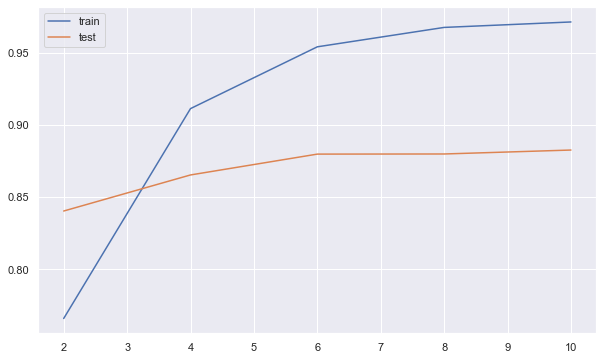

In [85]:
#Produce a plot with the score for the testing and training for the different max depths
#r2_score(y_test, y_predict)

#calculate y_predict on X_test
y_predict_2 = model_2.predict(X_test)
y_predict_4 = model_4.predict(X_test)
y_predict_6 = model_6.predict(X_test)
y_predict_8 = model_8.predict(X_test)
y_predict_10 = model_10.predict(X_test)

#calculate r2_score on a testing set
score_2_test = r2_score(y_test, y_predict_2)
score_4_test = r2_score(y_test, y_predict_4)
score_6_test = r2_score(y_test, y_predict_6)
score_8_test = r2_score(y_test, y_predict_8)
score_10_test = r2_score(y_test, y_predict_10)
test_scores = [score_2_test, score_4_test, score_6_test, score_8_test, score_10_test]
print(test_scores)

#calculate y_predict on X_train
y_predict_2tr = model_2.predict(X_train)
y_predict_4tr = model_4.predict(X_train)
y_predict_6tr = model_6.predict(X_train)
y_predict_8tr = model_8.predict(X_train)
y_predict_10tr = model_10.predict(X_train)

#calculate r2_score on a training set
score_2_train = r2_score(y_train, y_predict_2tr)
score_4_train = r2_score(y_train, y_predict_4tr)
score_6_train = r2_score(y_train, y_predict_6tr)
score_8_train = r2_score(y_train, y_predict_8tr)
score_10_train = r2_score(y_train, y_predict_10tr)
train_scores = [score_2_train, score_4_train, score_6_train, score_8_train, score_10_train]
print(train_scores)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(2,11,2), train_scores, label = "train")
ax.plot(range(2,11,2), test_scores, label = "test")
ax.legend()
plt.show()

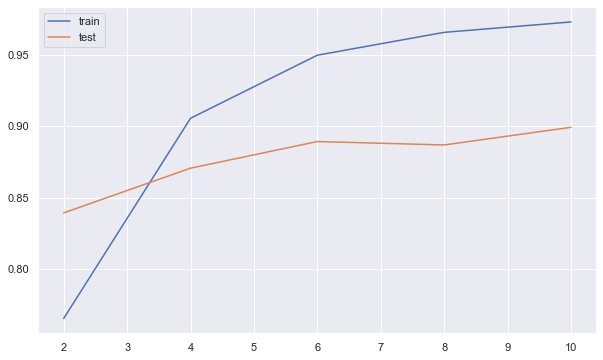

In [87]:
rfms = [RandomForestRegressor(max_depth=i).fit(X_train, y_train) for i in range(2,11,2)]
rftr = [r2_score(y_train, rfms[i].predict(X_train)) for i in range(5)]
rfte = [r2_score(y_test, rfms[i].predict(X_test)) for i in range(5)]
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(2,11,2), rftr, label = "train")
ax.plot(range(2,11,2), rfte, label = "test")
ax.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [15]:
#I honestly do not know.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [16]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [17]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [18]:
# Your response here